<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_NLPlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Different Operations**

Write a paragraph based on your interested Domain and that should incorporate the  special characters, punctuations, stop words, negation (don’t), Email Id, Phone Number  and Date of birth (27-March -2000).

In [45]:
import spacy
from spacy.matcher import Matcher
from string import punctuation
import nltk
import phonenumbers
import re
import datetime
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter

In [46]:
pip install phonenumbers

a. Count the number of unique tokens in the text.

In [60]:
# loading the spacy english model
nlp = spacy.load("en_core_web_sm")
para = "In the dynamic world of artificial intelligence, breakthroughs are happening every day. Don’t underestimate the impact of cutting-edge technologies! Developers are exploring neural networks, diving into deep learning algorithms, and unleashing the potential of NLP models like GPT-4. Organizations, large and small, are integrating these innovations into their workflows, revolutionizing the way we work and interact with machines. Amidst this transformation, it's important to address ethical concerns and ensure responsible AI development. Have a project in mind? Feel free to reach out to us at info@exampletech.com or give us a call at 6383576484. Our team is ready to collaborate on the next big thing. Born on 4-May-2000, AI continues to evolve, shaping a future where technology and humanity coexist seamlessly"
# processing the text with spaCy
doc = nlp(para)
# getting the unique tokens in the para
unique_tokens = set(token.text for token in doc)
num_unique_tokens = len(unique_tokens)
print(f"Number of unique tokens : {num_unique_tokens}")

Number of unique tokens : 106


b. Count the number of punctuation characters and remove punctuations.

In [48]:
# counting the punctuation characters
num_punctuation = sum(1 for token in doc if token.text in punctuation)
# paragraph without punctuation
paraWithoutPunc = ''.join(token.text for token in doc if token.text not in punctuation)

print(f"Number of punctuation characters : {num_punctuation}")
print(f"Para without punc : {paraWithoutPunc}")

Number of punctuation characters : 22
Para without punc : InthedynamicworldofartificialintelligencebreakthroughsarehappeningeverydayDon’tunderestimatetheimpactofcuttingedgetechnologiesDevelopersareexploringneuralnetworksdivingintodeeplearningalgorithmsandunleashingthepotentialofNLPmodelslikeGPT-4OrganizationslargeandsmallareintegratingtheseinnovationsintotheirworkflowsrevolutionizingthewayweworkandinteractwithmachinesAmidstthistransformationit'simportanttoaddressethicalconcernsandensureresponsibleAIdevelopmentHaveaprojectinmindFeelfreetoreachouttousatinfo@exampletech.comorgiveusacallat+11234567890OurteamisreadytocollaborateonthenextbigthingBornon4May-2000AIcontinuestoevolveshapingafuturewheretechnologyandhumanitycoexistseamlessly


c. Plot the distribution of stopwords used in the text using barplot.

Counter({'the': 5, 'and': 5, 'to': 5, 'of': 3, 'are': 3, 'a': 3, 'in': 2, 'into': 2, 'at': 2, 'on': 2, 'do': 1, 'these': 1, 'their': 1, 'we': 1, 'with': 1, 'this': 1, 'it': 1, 'have': 1, 'out': 1, 'or': 1, 'our': 1, 'is': 1, 'where': 1})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


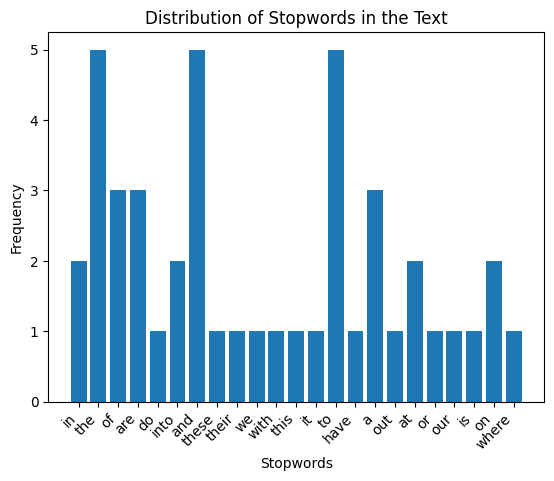

In [49]:
# getting the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# filtering out stopwords from the tokens
filteredTokens = [token.text.lower() for token in doc if token.text.lower() in stop_words]
# counting the occurrences of each stopword
stopword_counts = Counter(filteredTokens)
print(stopword_counts)

plt.bar(stopword_counts.keys(),stopword_counts.values())
plt.xlabel('Stopwords')
plt.ylabel('Frequency')
plt.title('Distribution of Stopwords in the Text')
plt.xticks(rotation=45, ha='right')
plt.show()

d. Remove the stopwords from the text

In [50]:
# removing the stopwords from the text
filteredTokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words]
paraWithoutStopwords = ''.join(filteredTokens)
print("Paragraph Without Stopwords: ")
print(paraWithoutStopwords)

Paragraph Without Stopwords: 
dynamicworldartificialintelligence,breakthroughshappeningeveryday.n’tunderestimateimpactcutting-edgetechnologies!developersexploringneuralnetworks,divingdeeplearningalgorithms,unleashingpotentialnlpmodelslikegpt-4.organizations,largesmall,integratinginnovationsworkflows,revolutionizingwayworkinteractmachines.amidsttransformation,'simportantaddressethicalconcernsensureresponsibleaidevelopment.projectmind?feelfreereachusinfo@exampletech.comgiveuscall+1-123-456-7890.teamreadycollaboratenextbigthing.born4-may-2000,aicontinuesevolve,shapingfuturetechnologyhumanitycoexistseamlessly


e. Plot the distribution of each POS Tag using a barplot

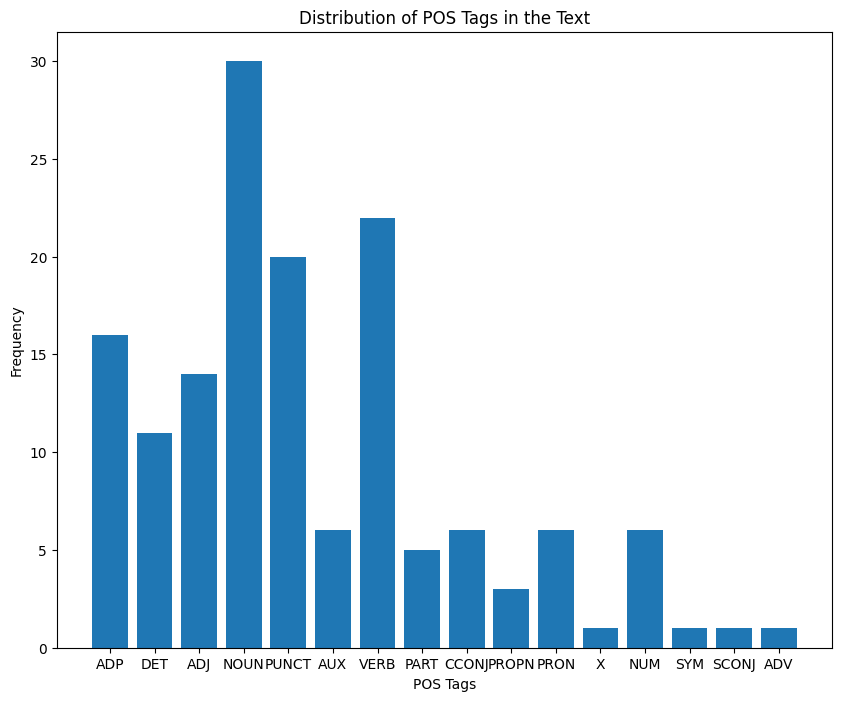

In [51]:
# getting part of speech tags and their occurrences
posTags = [token.pos_ for token in doc]
posTagsCounts = Counter(posTags)

plt.figure(figsize=(10,8))
plt.bar(posTagsCounts.keys(),posTagsCounts.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Distribution of POS Tags in the Text')
plt.show()

f. Determine the number of unique lemma available in the text

In [52]:
# getting unique lemma
uniqueLemma = set(token.lemma_ for token in doc)
# determining the number of unique lemma
numUniqueLemma = len(uniqueLemma)
print(f"Number of Unique Lemma: {numUniqueLemma}")

Number of Unique Lemma: 104


g. Plot the frequency distribution of words in the text. Display only the top 10  (most occurring) tokens in the chart.

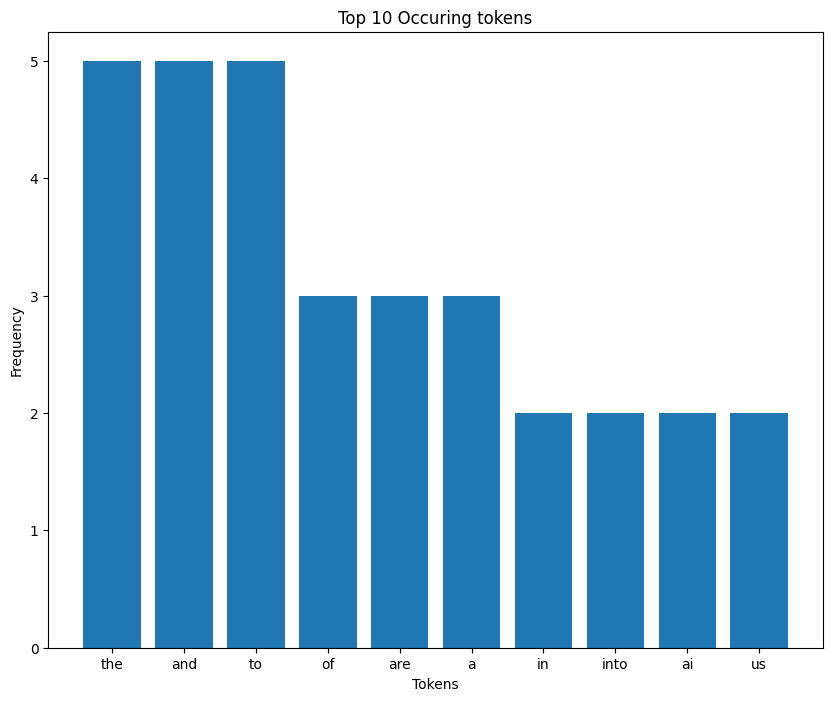

In [53]:
# getting word frequencies
wordFrequencies = Counter(token.text.lower() for token in doc if token.is_alpha)
# getting the top 10 most occuring tokens
top10 = dict(wordFrequencies.most_common(10))

plt.figure(figsize=(10,8))
plt.bar(top10.keys(),top10.values())
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Occuring tokens')
plt.show()

j. Find the number of unique bigrams, trigrams and quadgrams (n=4) in the corpus i. Find all dates and convert them to the DD-MM-YYYY format.

In [54]:
# function to extract ngrams
def extractNgrams(tokens,n):
  ngrams = []
  for i in range(len(tokens)-n+1):
    ngram = ''.join(tokens[i:i+n])
    ngrams.append(ngram)
  return ngrams

# getting tokens
tokens = [token.text for token in doc]

# getting unique bigrams,trigrams and quad
uniqueBigrams = set(extractNgrams(tokens,2))
uniqueTrigrams = set(extractNgrams(tokens,3))
uniqueQuadgrams = set(extractNgrams(tokens,4))

print(f"Number of unique bigrams: {len(uniqueBigrams)}")
print(f"Number of unique trigrams: {len(uniqueTrigrams)}")
print(f"Number of unique quadgrams: {len(uniqueQuadgrams)}")

Number of unique bigrams: 148
Number of unique trigrams: 147
Number of unique quadgrams: 146


i. Find all dates and convert them to the DD-MM-YYYY format

In [55]:
dates = re.findall(r'\d{1,2}-[A-Za-z]+-\d{4}', para)
new_dates_format = [datetime.datetime.strptime(date, '%d-%B-%Y').strftime('%d-%m-%Y') for date in dates]
print(f'Dates converted to DD-MM-YYYY format: {new_dates_format}')

Dates converted to DD-MM-YYYY format: ['04-05-2000']


 j. Plot a distribution of the different values of year occurring in the text

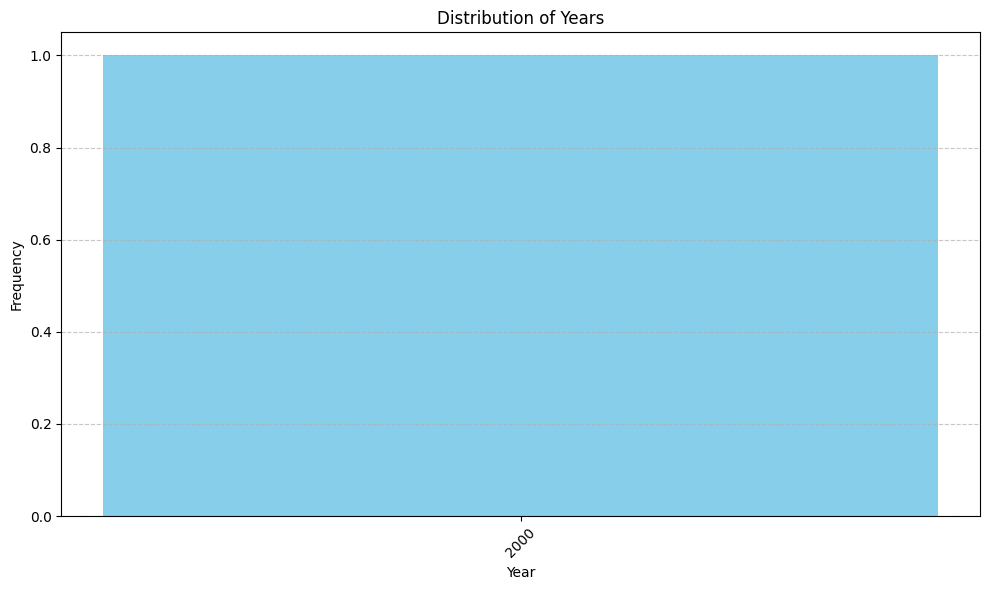

In [68]:
# defining a regular expression pattern to find years
year_pattern = r'\b\d{4}\b'

# finding all years in the text
years = re.findall(year_pattern, para)
# counting the occurrences of each year
year_counts = {}
for year in years:
    year_counts[year] = year_counts.get(year, 0) + 1

# extracting the years and their corresponding counts
years = list(year_counts.keys())
counts = list(year_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

k. Determine whether the text contains any phone numbers in it. Ensure the phone  numbers are valid if any. If an invalid phone number is found, remove it from  the text.


In [70]:
def is_valid_phone_number(phone_number):
    try:
        parsed_number = phonenumbers.parse(phone_number, None)
        return phonenumbers.is_valid_number(parsed_number)
    except phonenumbers.NumberParseException:
        return False

# extracting phone numbers using a regular expression
phone_numbers = re.findall(r'\b\d{10}\b|\+\d{1,3}[-.\s]?\(?\d{1,4}\)?[-.\s]?\d{1,10}\b', para)
print(phone_numbers)

# checking and removing invalid phone numbers from the text
for phone_number in phone_numbers:
    if not is_valid_phone_number(phone_number):
        paragraph = para.replace(phone_number, '')

print("Text with valid phone numbers:")
print(paragraph)

['6383576484']
Text with valid phone numbers:
In the dynamic world of artificial intelligence, breakthroughs are happening every day. Don’t underestimate the impact of cutting-edge technologies! Developers are exploring neural networks, diving into deep learning algorithms, and unleashing the potential of NLP models like GPT-4. Organizations, large and small, are integrating these innovations into their workflows, revolutionizing the way we work and interact with machines. Amidst this transformation, it's important to address ethical concerns and ensure responsible AI development. Have a project in mind? Feel free to reach out to us at info@exampletech.com or give us a call at . Our team is ready to collaborate on the next big thing. Born on 4-May-2000, AI continues to evolve, shaping a future where technology and humanity coexist seamlessly


# **Applications**



In the rapidly evolving landscape of artificial intelligence (AI) and cutting-edge technologies, breakthroughs are reshaping diverse industries. Neural networks and deep learning algorithms, exemplified by models like GPT-4, are powering advancements in natural language processing (NLP) for more nuanced communication and content generation.

Ethical considerations in AI development are gaining prominence to ensure responsible use, addressing biases and promoting transparency. Additionally, contact information, including email and phone numbers, plays a pivotal role in business communication, marketing outreach, and collaboration. Birthdates, providing insights into individuals' ages, contribute to personalization and age verification in various contexts. This convergence of technologies and ethical considerations is fueling innovation, revolutionizing how we work, interact, and shape a future where technology and humanity seamlessly coexist.

# **Conclusion**

Thus for a random document, different operations are performed as mentioned in the question. And different applications also listed above.